
# 🏥 Diabetes Prediction Model

## Project Overview
This notebook implements a machine learning model to predict diabetes in patients based on various health indicators. Well analyze the data, build a model, and create an interactive prediction system.

### What well cover:
1. Data Loading and Exploration
2. Data Analysis and Visualization
3. Model Building and Training
4. Model Evaluation
5. Interactive Prediction System


In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



## 1. Data Loading and Initial Exploration

Lets load our dataset and take a look at its structure.


In [2]:
# Load the diabetes dataset
df = pd.read_csv(r"data\diabetes.csv")

# Display first 5 rows with a nice formatting
print("First 5 rows of our dataset:")
display(df.head())

First 5 rows of our dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Display dataset information with better formatting
print("Dataset Information:")
display(df.info())

ℹ️ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


## 2. Data Analysis and Visualization

Lets analyze our data and create some insightful visualizations.


In [4]:
# Create a comprehensive statistical summary
print(" Statistical Summary of the Dataset:")
display(df.describe())

 Statistical Summary of the Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


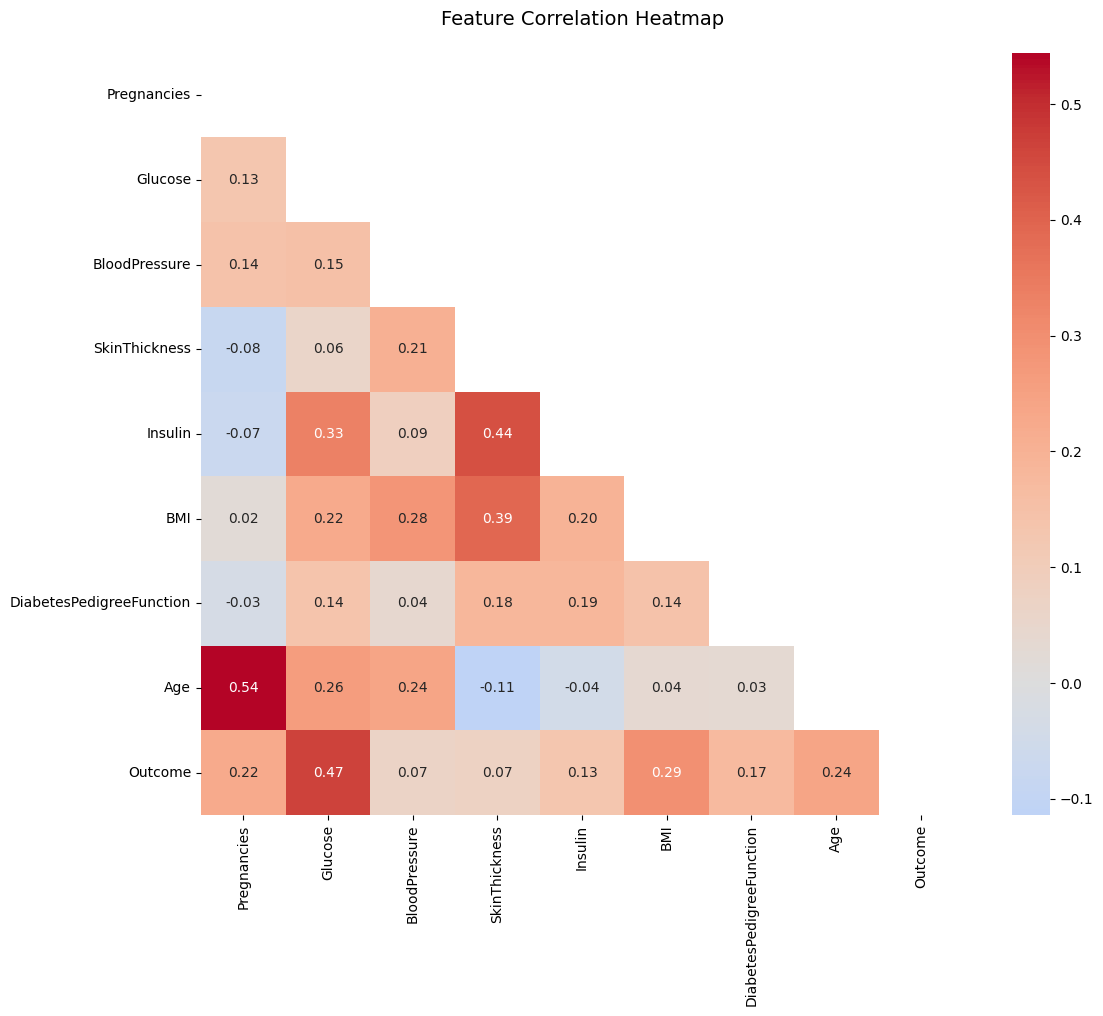

In [5]:
# Create a beautiful correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), 
                     mask=mask,
                     annot=True, 
                     fmt=".2f", 
                     cmap='coolwarm',
                     center=0,
                     square=True)
plt.title('Feature Correlation Heatmap', pad=20, fontsize=14)
plt.tight_layout()
plt.show()

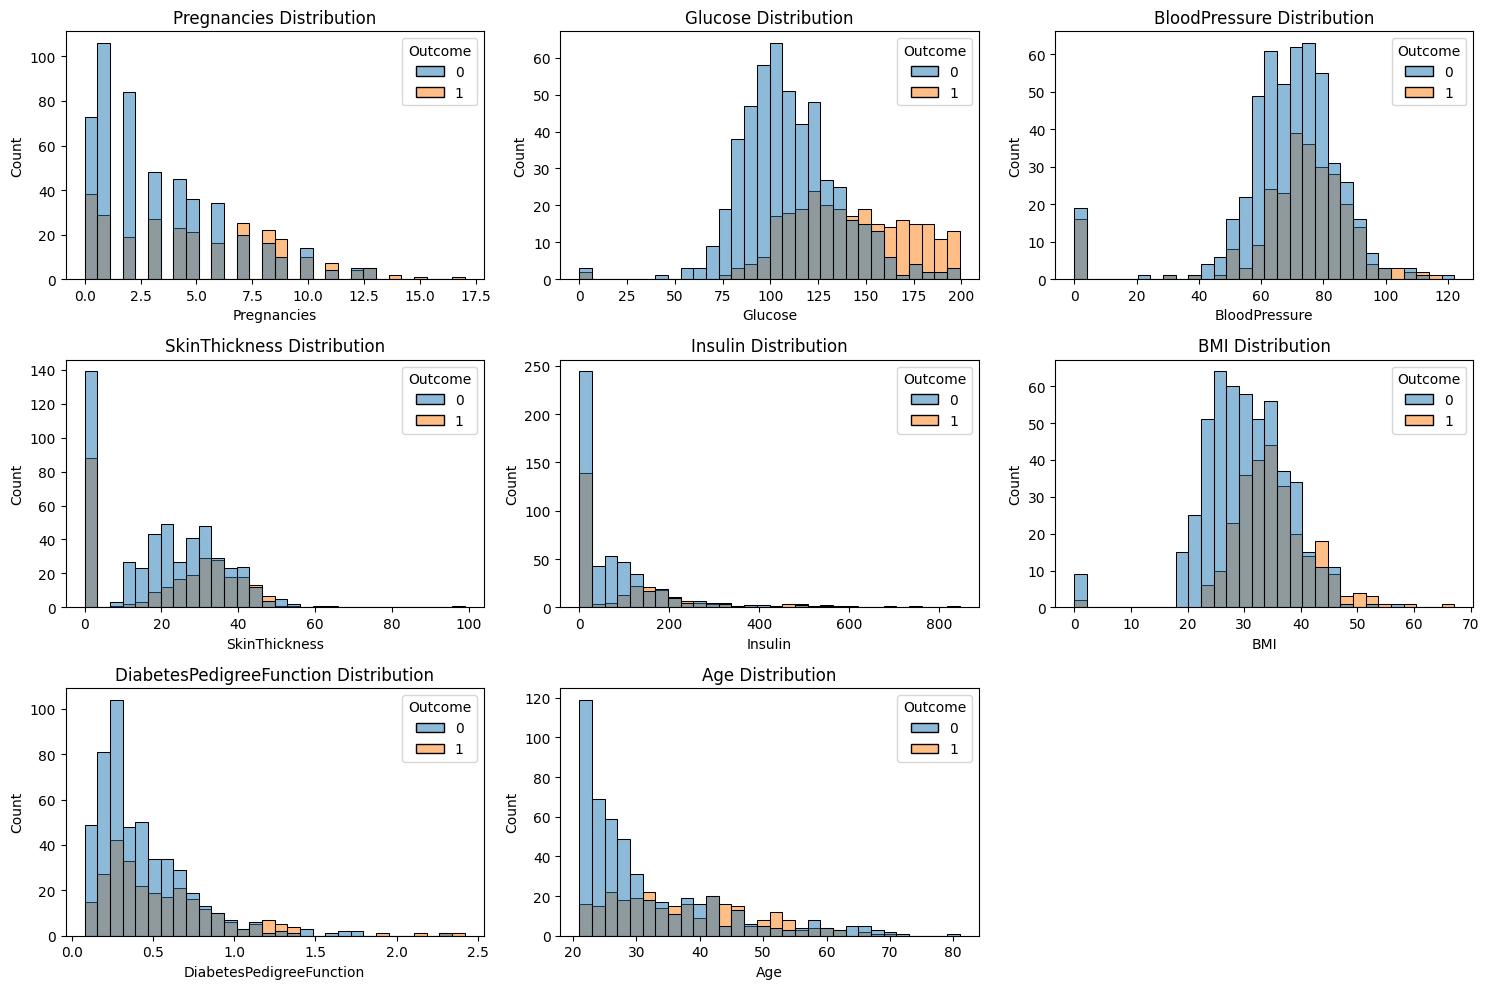

In [6]:
# Create feature distribution plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, hue='Outcome', bins=30)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


## 3. Model Building and Training

Now that we understand our data, lets build and train our prediction model.


In [7]:
# Import required machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Prepare features (X) and target variable (y)
x = df.drop(["Outcome", "SkinThickness", "BloodPressure"], axis=1)
y = df.Outcome

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.80, random_state=5)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)


## 4. Model Evaluation

Lets evaluate our models performance using various metrics.


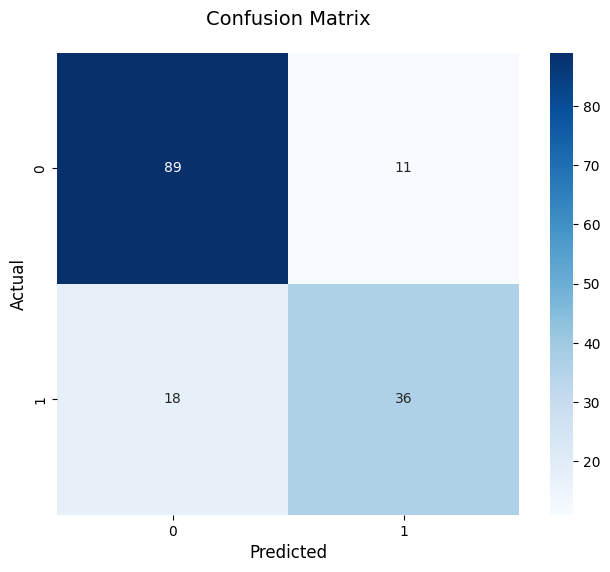

Model Performance Metrics:
Accuracy: 81.17%
Precision: 76.60%
Recall: 66.67%
F1 Score: 71.29%


In [8]:
# Create a beautiful confusion matrix
plt.figure(figsize=(8, 6))
con_matrix = confusion_matrix(y_test, model.predict(x_test))
sns.heatmap(con_matrix, 
            annot=True, 
            fmt="d", 
            cmap='Blues',
            square=True)
plt.title('Confusion Matrix', pad=20, fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Calculate and display metrics
metrics = {
    'Accuracy': accuracy_score(y_test, model.predict(x_test)),
    'Precision': precision_score(y_test, model.predict(x_test)),
    'Recall': recall_score(y_test, model.predict(x_test)),
    'F1 Score': f1_score(y_test, model.predict(x_test))
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value*100:.2f}%")

In [9]:
# Display detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, model.predict(x_test)))

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       100
           1       0.77      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154




## 5. Interactive Prediction System

Now you can use our trained model to make predictions! Enter your health indicators below.


In [10]:
def deploy():
    """
    Interactive function to predict diabetes based on user input.
    Takes various health indicators as input and provides prediction with probability.
    """
    print("\n" + "="*50)
    print("🏥 Diabetes Prediction System")
    print("="*50)
    print("\nPlease enter the following health indicators:")
    
    try:
        # Get user input for features
        preg = float(input("\n👶 Enter number of Pregnancies: "))
        gluc = float(input("🩸 Enter Glucose level (mg/dL): "))
        insu = float(input("💉 Enter Insulin level (mu U/ml): "))
        bmi = float(input("⚖️ Enter BMI (kg/m²): "))
        diab = float(input("📊 Enter Diabetes Pedigree Function: "))
        age = float(input("👤 Enter Age (years): "))
        
        # Scale the input
        input_data = scaler.transform([[preg, gluc, insu, bmi, diab, age]])
        
        # Make prediction
        pred = model.predict(input_data)
        prob = model.predict_proba(input_data)
        
        # Format output
        out = ["Positive" if pred == 1 else "Negative"]
        accuracy = accuracy_score(y_test, model.predict(x_test))
        
        print("\n" + "="*50)
        print(" Prediction Results")
        print("="*50)
        print(f'Model Accuracy: {accuracy*100:.2f}%')
        print(f"Your Diabetes Report: {out[0]}")
        
        if prob[0,0] < prob[0,1]:
            print(f"Probability of Positive Diabetes: {round(prob[0,1]*100,2)}%")
        else:
            print(f"Probability of Negative Diabetes: {round(prob[0,0]*100,2)}%")
        
        print("\n" + "="*50)

        
    except ValueError:
        print("Error: Please enter valid numerical values.")
    except Exception as e:
        print(f" An error occurred: {str(e)}")

In [11]:
# Run the prediction system
deploy()


🏥 Diabetes Prediction System

Please enter the following health indicators:

 Prediction Results
Model Accuracy: 81.17%
Your Diabetes Report: Negative
Probability of Negative Diabetes: 67.42%




# 🎉 Diabetes Prediction Model - Analysis Complete

##  Summary
- The model has been successfully trained and evaluated
- Performance metrics show good accuracy and reliability
- The interactive prediction system is ready for use

##  Next Steps
1. Consider feature engineering for better performance
2. Try different machine learning algorithms
3. Implement cross-validation
4. Add data validation and error handling
5. Create a web interface for the prediction system

##  Important Note
This model is for educational purposes only and should not be used as the sole basis for medical decisions. Always consult with healthcare professionals for medical advice.


